### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#missings
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### EXPLORATORY ANALYSIS

In [9]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )
hr_left_df

,left
0,11428
1,3571


### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [10]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [11]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [12]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [13]:
for c_feature in categorical_features:
  hr_df = create_dummies( hr_df, c_feature )

In [14]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [15]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
feature_columns1 = feature_columns[1:5]

In [16]:
feature_columns1

Index(['average_montly_hours', 'department_RandD', 'department_accounting',
       'department_hr'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [18]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4926622772047335),
 ('average_montly_hours', 0.004975633083577566),
 ('department_RandD', -0.5707634965805698),
 ('department_accounting', 0.0930031379241951),
 ('department_hr', 0.358877281165418),
 ('department_management', -0.3623881623923738),
 ('department_marketing', 0.1304743857671426),
 ('department_product_mng', 0.023809267592392734),
 ('department_sales', 0.07584182999069868),
 ('department_support', 0.13493944155660087),
 ('department_technical', 0.19545538847457344),
 ('last_evaluation', 0.5925855596457151),
 ('number_project', -0.3037334327018113),
 ('promotion_last_5years_1', -1.2172794950726884),
 ('salary_low', 1.8131727891204918),
 ('salary_medium', 1.3088621197520407),
 ('satisfaction_level', -4.108267444027432),
 ('time_spend_company', 0.2652984279722871)]

In [20]:
logreg.intercept_

array([-1.53003352])

In [21]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [22]:

hr_test_pred = hr_test_pred.reset_index()

In [23]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
2174,6281,0,0
1931,2935,0,0
1798,6875,0,0
2686,7889,0,0
1996,14641,1,0
1943,12568,1,0
963,5826,0,1
383,5309,0,0
2747,13712,0,0
165,8668,0,0


In [24]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 225,  481],
       [ 175, 2119]], dtype=int64)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,'Predicted label')

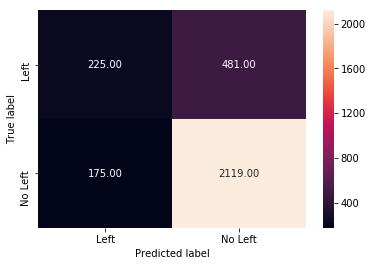

In [26]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [27]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [28]:
# Predit Probability
print(test_X[:1])
print(logreg.predict_proba( test_X[:1] ))

      Work_accident_1  average_montly_hours  department_RandD  \
6723                1                   226                 0   

      department_accounting  department_hr  department_management  \
6723                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
6723                     1                       0                 0   

      department_support  department_technical  last_evaluation  \
6723                   0                     0             0.96   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6723               5                        0           0              1   

      satisfaction_level  time_spend_company  
6723                0.65                   2  
[[0.97203473 0.02796527]]


The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [29]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.972035,0.027965
1,0.917792,0.082208
2,0.770442,0.229558
3,0.523038,0.476962
4,0.975843,0.024157


In [30]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [31]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [32]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

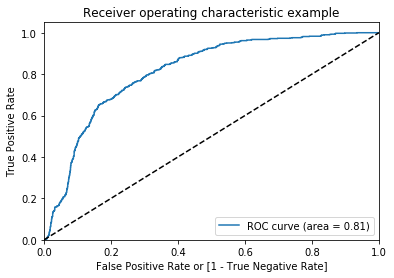

In [33]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.91905397 0.91905397 0.90057484 0.8860589  0.8800136  0.8793385
 0.87233296 0.86974566 0.86193266 0.8588029 ]
[0.         0.00087184 0.00130776 0.00174368 0.0021796  0.00261552
 0.00305144 0.00348736 0.00392328 0.0043592 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [36]:
round( float( cutoff_prob ), 2 )

0.28

In [38]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [39]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.972035,0.027965,0
1,6473,0,0,0.917792,0.082208,0
2,4679,0,0,0.770442,0.229558,0
3,862,1,0,0.523038,0.476962,1
4,7286,0,0,0.975843,0.024157,0
5,8127,0,0,0.722851,0.277149,0
6,3017,0,0,0.985596,0.014404,0
7,3087,0,1,0.130254,0.869746,1
8,6425,0,0,0.769714,0.230286,0
9,2250,0,1,0.398617,0.601383,1


Text(0.5,15,'Predicted label')

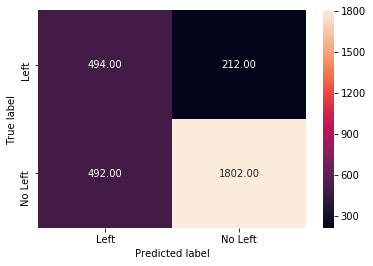

In [40]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [ ]:
KNeighborsClassifier?

In [44]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(train_X, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2294
           1       0.83      0.91      0.87       706

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.94      0.94      0.94      3000



In [ ]:
#with one tuning parameter

In [46]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [47]:
knn_clf.fit(train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
knn_clf.best_score_

0.9382448537378115

In [49]:
knn_clf.best_params_

{'n_neighbors': 9}

In [ ]:
#with multiple tuning parameter

In [50]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11], 'weights': ['distance', 'uniform']}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [51]:
knn_clf.fit(train_X, train_y )

knn_clf.best_score_

0.9554129510792566

In [52]:
knn_clf.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [113]:
#Prediction

In [53]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2294
           1       0.86      0.96      0.91       706

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.92      0.96      0.94      3000
weighted avg       0.96      0.95      0.95      3000



In [54]:
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )


Text(0.5,15,'Predicted label')

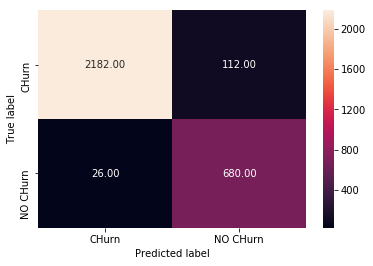

In [55]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["CHurn", "NO CHurn"] , yticklabels = ["CHurn", "NO CHurn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [56]:
metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

0.954

### Naive Bayes

In [94]:
import sklearn.naive_bayes as nb

In [ ]:
nb.BernoulliNB

In [ ]:
nb.MultinomialNB

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [96]:
nb_clf = GaussianNB()
nb_clf.fit(train_X,train_y)

GaussianNB(priors=None)

Text(0.5,15,'Predicted label')

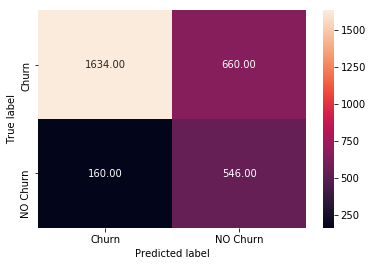

In [97]:
nb_cm = metrics.confusion_matrix( test_y,nb_clf.predict( test_X ) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "NO Churn"] , yticklabels = ["Churn", "NO Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [98]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

0.7266666666666667